<center><b>Backpropagation algorithm</b></center>
<center><b>Studying the problem of curve fitting</b></center>

<b>Objective:</b>
<ul>
    <li>The objective of this experiment is to study the backpropagation algorithm by solving a curve fitting problem.</li>
    <li>The custom curve used for this task is di = sin(20xi) + 3xi + vi</li>
    <li>The effects of choosing hyperparameters like weight initialization, number of incoming neurons, learning rate are studied to identify their impact on backpropagation.</li>
</ul>

In [1]:
#Import statements
import numpy as np
import math
import matplotlib.pyplot as plt

In [13]:
#Initialization

n = 300

X = np.random.uniform(low = 0, high = 1, size = (n,))
X = X.reshape(n, 1)
print("Shape of X vector:", X.shape)

v = np.random.uniform(low = -0.1, high = 0.1, size = (n,))
v = v.reshape(n, 1)
print("Shape of v vector:", v.shape)

d = np.sin(20 * X) + (3 * X) + v
print("Shape of d vector:", d.shape)

Shape of X vector: (300, 1)
Shape of v vector: (300, 1)
Shape of d vector: (300, 1)


In [14]:
def plotData(dataX, dataY, title, xLabel, yLabel):
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.plot(dataX, dataY, '.')
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

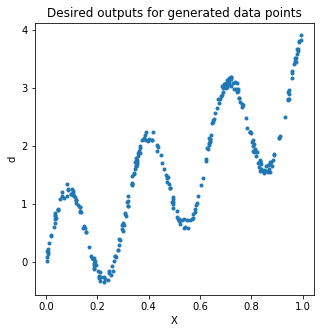

In [15]:
plotData(X, d, "Desired outputs for generated data points", "X", "d")

In [16]:
#Number of hidden neurons
N = 24

import math
from random import gauss

def initW1W2():
    mean_val = 0
    variance_val = 1/N
    
    W1 = np.random.normal(mean_val, math.sqrt(1), N*2)
    W1 = np.asarray(W1).reshape(N, 2)

    #Weights generated using independent identically distributed random variables with mean 0 and variance 1/N
    W2 = np.random.normal(mean_val, math.sqrt(variance_val), N+1)
    W2 = np.asarray(W2).reshape(1, N+1)
    
    return W1, W2

In [17]:
#Define the cost function
def getMSE(d, y):
    mse = (np.square(d - y)).mean()
    return mse

In [18]:
#Append a row of 1 for bias to the input data
tempX = np.ones(X.shape[0], dtype=int).reshape(1, X.shape[0])
dataX = np.append(tempX, X.reshape(1, X.shape[0]), axis=0)

In [19]:
#Defining the activation functions and their derivatives

def tanh(x):
    return np.tanh(x)

def tanh_derv(x):
    return 1 - np.square(np.tanh(x))

def identityFn(x):
    return x

def identityFn_derv(x):
    return 1

def output_derv(N, d, y):
    return d - y

In [20]:
def plotCost(cost):
    plt.rcParams["figure.figsize"] = [7, 5]
    plt.plot(range(len(cost)), cost)
    plt.title("Cost update")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()

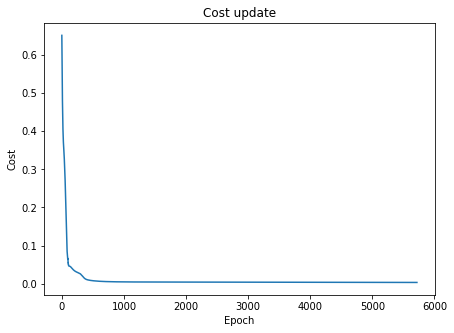

In [21]:
epoch = 0

W1, W2 = initW1W2()

eta1 = 2 #Setting learning rate for the hidden layer higher since the number of incoming connections is 1
eta2 = 1/math.sqrt(N) * 0.01 #Setting the learning rate inversely propotional to the number of incoming connections

mse_tracker = []

while True:
    Y = []
    for i in range(X.shape[0]):
        #Forward pass
        a_induced = np.matmul(W1, dataX[:, i].reshape(2, 1))
        a_activated = tanh(a_induced)
        tempA = np.ones((1,1), dtype=int).reshape(1, 1)
        finalA = np.append(tempA, a_activated, axis=0)
        a2_induced = np.matmul(W2, finalA)
        a2_activated = identityFn(a2_induced)
        y = a2_activated
        Y.append(y[0, 0])
    
        #Backward pass
        a2_backward = identityFn_derv(a2_induced)
        a_backward = tanh_derv(a_induced)
        
        #Weights update
        y_prime = output_derv(N, d[i], y)
        dEdW2 = - a_activated * y_prime * a2_backward
        dEdb2 = - y_prime * a2_backward
        dEdW1 = - X[i] * y_prime * a2_backward * W2[0, 1:].reshape(N, 1) * a_backward
        dEdb1 = - y_prime * a2_backward * a_backward * W2[0, 1:].reshape(N, 1)
        
        newW2 = W2[0, 1:].reshape(N, 1) - (eta2 * dEdW2)
        newB2 = W2[0, 0] - (eta2 * dEdb2)
        W2 = np.append(newB2, newW2).reshape(1, N+1)
        newW1 = W1[:, 1].reshape(N, 1) - (eta1 * dEdW1)
        newB1 = W1[:, 0].reshape(N, 1) - (eta1 * dEdb1)
        W1 = np.append(newB1, newW1, axis=1)
        
    epoch += 1
    
    #MSE update
    #Calculating Y using final weights
    Y2 = []
    for i in range(X.shape[0]):
        a_induced = np.matmul(W1, dataX[:, i].reshape(2, 1))
        a_activated = tanh(a_induced)
        tempA = np.ones((1,1), dtype=int).reshape(1, 1)
        finalA = np.append(tempA, a_activated, axis=0)
        a2_induced = np.matmul(W2, finalA)
        a2_activated = identityFn(a2_induced)
        y = a2_activated
        Y2.append(y[0, 0])
    mse_tracker.append(getMSE(d, np.asarray(Y2).reshape(len(Y2), 1)))
    
    if len(mse_tracker) > 1:
        if mse_tracker[-1] and abs(mse_tracker[-1] - mse_tracker[-2]) < 1e-7: #threshold reached
            break
        elif mse_tracker[-1] > mse_tracker[-2]: #divergence detected -> reduce learning rate
            eta1 -= 0.1 * eta1
        
plotCost(mse_tracker)

In [22]:
print("Minimized cost:", mse_tracker[-1])
print("Number of epochs trained for convergence:", len(mse_tracker))

Minimized cost: 0.003688806776871285
Number of epochs trained for convergence: 5718


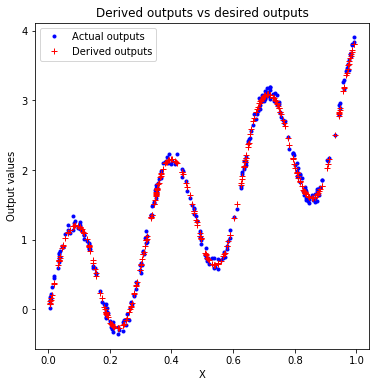

In [23]:
#Plotting the derived values vs actual values
plt.rcParams["figure.figsize"] = [6, 6]
plt.plot(X, d, 'b.', label = "Actual outputs")
plt.plot(X, Y2, 'r+', label = "Derived outputs")
plt.title("Derived outputs vs desired outputs")
plt.xlabel("X")
plt.ylabel("Output values")
plt.legend(loc='upper left')
plt.show()